<a href="https://colab.research.google.com/github/iabiola1979/Course-10----Applied-Data-Science-Capstone/blob/main/Coursera_ML_Exam_Module3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data

from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression

# Support Vector Machine classification algorithm
from sklearn.svm import SVC

# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier

# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier



def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['Not Default', 'Default']); ax.yaxis.set_ticklabels(['Not Default', 'Default'])
    plt.show()


import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')




In [4]:
!pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# data (as pandas dataframes)
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets

# metadata
print(default_of_credit_card_clients.metadata)

# variable information
print(default_of_credit_card_clients.variables)


X['AvgBill_3'] = (X.X12 +X.X13 +X.X14)/3.0
X['AvgBill_6'] = (X.X12 +X.X13 +X.X14 +X.X15 +X.X16 +X.X17)/6.0

X['AvgAmtPaid_3'] = (X.X18 +X.X19 +X.X20)/3.0
X['AvgAmtPaid_6'] = (X.X18 +X.X19 +X.X20 +X.X21 +X.X22 +X.X23)/6.

zdf = pd.concat([X, y], axis=1)
zdf.describe().transpose()



X_scaled = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1230)






{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive accuracy of 

<ipython-input-6-5e4e8cb04a07>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AvgBill_3'] = (X.X12 +X.X13 +X.X14)/3.0


In [28]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:


def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

def roc_curve_calc(yt, predprob):
  fpr, tpr, thresholds = metrics.roc_curve(yt, predprob, pos_label=1)
  xc = {'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds}
  return pd.DataFrame(xc)





## Logistic Regression
##### >Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

> Add blockquote






In [30]:

lr=LogisticRegression().fit(X_train, Y_train)
yhat_train = lr.predict(X_train)
yhat_train_prob = lr.predict_proba(X_train)[:,1]

yhat_test = lr.predict(X_test)
yhat_test_prob = lr.predict_proba(X_test)[:,1]

lr_train_perf_metrics = evaluate_metrics(Y_train, yhat_train)
lr_test_perf_metrics = evaluate_metrics(Y_test, yhat_test)


#train_df = pd.DataFrame({'True': Y_train, 'Logistic':np.array(yhat_train_prob)}) # 'RandomForest': y_pred_rf})


#test_df = pd.DataFrame({'True': Y_test, 'Logistic': np.array(hat_test_prob)}) # 'RandomForest': y_pred_rf})

log_roc_train = roc_curve_calc(Y_train, yhat_train_prob)
auc_train = metrics.auc(log_roc_train['fpr'], log_roc_train['tpr'])
log_roc_test = roc_curve_calc(Y_test, yhat_test_prob)
auc_test = metrics.auc(log_roc_test['fpr'], log_roc_test['tpr'])



lr_train_perf_metrics['auc']  = auc_train
lr_test_perf_metrics['auc']  = auc_test


#lr_train_perf_ = pd.DataFrame(lr_train_perf_metrics)
#lr_test_pref_  = pd.DataFrame(lr_test_perf_metrics)


print(lr_train_perf_metrics)
print(lr_test_perf_metrics)
#print(lr_test_perf_)








{'accuracy': 0.8117142857142857, 'recall': 0.254708904109589, 'precision': 0.7160048134777377, 'f1score': 0.37574992106094096, 'auc': 0.7306227329576724}
{'accuracy': 0.8106666666666666, 'recall': 0.2469450101832994, 'precision': 0.6830985915492958, 'f1score': 0.36275243081525804, 'auc': 0.7108135828077655}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
Y_train_= pd.DataFrame(Y_train)
Y_test_= pd.DataFrame(Y_test)


In [33]:
Y_train_['logistic'] = yhat_train_prob
Y_test_['logistic'] = yhat_test_prob




# Support Vector Machine Method
\

In [34]:

sv = SVC(probability=True).fit(X_train, Y_train)
svhat_train = sv.predict(X_train)
svhat_train_prob = sv.predict_proba(X_train)[:,1]

svhat_test = sv.predict(X_test)
svhat_test_prob = sv.predict_proba(X_test)[:,1]

sv_train_perf_metrics = evaluate_metrics(Y_train, svhat_train)
sv_test_perf_metrics = evaluate_metrics(Y_test, svhat_test)

sv_roc_train = roc_curve_calc(Y_train, svhat_train_prob)
auc_train = metrics.auc(sv_roc_train['fpr'], sv_roc_train['tpr'])

sv_roc_test = roc_curve_calc(Y_test, svhat_test_prob)
auc_test = metrics.auc(sv_roc_test['fpr'], sv_roc_test['tpr'])



sv_train_perf_metrics['auc']  = auc_train
sv_test_perf_metrics['auc']  = auc_test



print(sv_train_perf_metrics)
print(sv_test_perf_metrics)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'accuracy': 0.826, 'recall': 0.3625856164383562, 'precision': 0.7147679324894515, 'f1score': 0.48111332007952284, 'auc': 0.785992980532223}
{'accuracy': 0.8158888888888889, 'recall': 0.3273930753564155, 'precision': 0.6567926455566905, 'f1score': 0.43696907917091404, 'auc': 0.7115020699480936}


In [38]:
Y_train_['SVC'] = svhat_train_prob
Y_test_['SVC'] = svhat_test_prob

## Decision  Tree Classifier

In [39]:

tree = DecisionTreeClassifier(max_depth=3, min_samples_split=500, min_samples_leaf=250, random_state=123).fit(X_train, Y_train)
treehat_train = tree.predict(X_train)
treehat_train_prob = tree.predict_proba(X_train)[:,1]

treehat_test = tree.predict(X_test)
treehat_test_prob = tree.predict_proba(X_test)[:,1]

tree_train_perf_metrics = evaluate_metrics(Y_train, treehat_train)
tree_test_perf_metrics = evaluate_metrics(Y_test, treehat_test)

tree_roc_train = roc_curve_calc(Y_train, treehat_train_prob)
auc_train = metrics.auc(tree_roc_train['fpr'], tree_roc_train['tpr'])

tree_roc_test = roc_curve_calc(Y_test, treehat_test_prob)
auc_test = metrics.auc(tree_roc_test['fpr'], tree_roc_test['tpr'])

tree_train_perf_metrics['auc']  = auc_train
tree_test_perf_metrics['auc']  = auc_test

print(tree_train_perf_metrics)
print(tree_test_perf_metrics)


{'accuracy': 0.8223809523809524, 'recall': 0.3872003424657534, 'precision': 0.6760089686098655, 'f1score': 0.49237887860642354, 'auc': 0.7404082964992482}
{'accuracy': 0.8163333333333334, 'recall': 0.36914460285132383, 'precision': 0.636523266022827, 'f1score': 0.4672897196261682, 'auc': 0.722718678973079}


In [40]:
Y_train_['Decsn Tree'] = treehat_train_prob
Y_test_['Descn Tree'] = treehat_test_prob

# Stochastic Gradient Decent Classifier


In [41]:
from sklearn.ensemble import GradientBoostingClassifier
sgd = GradientBoostingClassifier(min_samples_split=500,min_samples_leaf=250,learning_rate=0.01).fit(X_train, Y_train)
sgdhat_train = sgd.predict(X_train)
sgdhat_train_prob = sgd.predict_proba(X_train)[:,1]

sgdhat_test = sgd.predict(X_test)
sgdhat_test_prob = sgd.predict_proba(X_test)[:,1]

sgd_train_perf_metrics = evaluate_metrics(Y_train, sgdhat_train)
sgd_test_perf_metrics = evaluate_metrics(Y_test, sgdhat_test)

sgd_roc_train = roc_curve_calc(Y_train, sgdhat_train_prob)
auc_train = metrics.auc(sgd_roc_train['fpr'], sgd_roc_train['tpr'])

sgd_roc_test = roc_curve_calc(Y_test, sgdhat_test_prob)
auc_test = metrics.auc(sgd_roc_test['fpr'], sgd_roc_test['tpr'])

sgd_train_perf_metrics['auc']  = auc_train
sgd_test_perf_metrics['auc']  = auc_test

print(sgd_train_perf_metrics)
print(sgd_test_perf_metrics)



/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'accuracy': 0.819, 'recall': 0.2872431506849315, 'precision': 0.7402095973524545, 'f1score': 0.4138781804163454, 'auc': 0.7756557184628639}
{'accuracy': 0.8143333333333334, 'recall': 0.26221995926680247, 'precision': 0.6987788331071914, 'f1score': 0.381340244353943, 'auc': 0.7595421032247307}


In [43]:
Y_train_['GradBoostTrees'] = sgdhat_train_prob
Y_test_['GradBoostTrees'] = sgdhat_test_prob

# Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_leaf_nodes=500,max_depth=5,min_samples_split=500,min_samples_leaf=250,random_state=123).fit(X_train, Y_train)
rfchat_train = rfc.predict(X_train)
rfchat_train_prob = rfc.predict_proba(X_train)[:,1]

rfchat_test = rfc.predict(X_test)
rfchat_test_prob = rfc.predict_proba(X_test)[:,1]

rfc_train_perf_metrics = evaluate_metrics(Y_train, rfchat_train)
rfc_test_perf_metrics = evaluate_metrics(Y_test, rfchat_test)

rfc_roc_train = roc_curve_calc(Y_train, rfchat_train_prob)
auc_train = metrics.auc(rfc_roc_train['fpr'], rfc_roc_train['tpr'])

rfc_roc_test = roc_curve_calc(Y_test, rfchat_test_prob)
auc_test = metrics.auc(rfc_roc_test['fpr'], rfc_roc_test['tpr'])

rfc_train_perf_metrics['auc']  = auc_train
rfc_test_perf_metrics['auc']  = auc_test

print(rfc_train_perf_metrics)
print(rfc_test_perf_metrics)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'accuracy': 0.8135238095238095, 'recall': 0.2831763698630137, 'precision': 0.7, 'f1score': 0.40323072234074975, 'auc': 0.7851711940745538}
{'accuracy': 0.8116666666666666, 'recall': 0.26782077393075354, 'precision': 0.6717752234993615, 'f1score': 0.3829632326174008, 'auc': 0.767732668707572}


In [45]:
Y_train_['RandomForestClassif'] = rfchat_train_prob
Y_test_['RandomForestClassif'] = rfchat_test_prob

#Neural Network  - MLP Classifiers

In [49]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5,), solver='sgd',max_iter=1500).fit(X_train, Y_train)
mlphat_train = mlp.predict(X_train)
mlphat_train_prob = mlp.predict_proba(X_train)[:,1]

mlphat_test = mlp.predict(X_test)
mlphat_test_prob = mlp.predict_proba(X_test)[:,1]

mlp_train_perf_metrics = evaluate_metrics(Y_train, mlphat_train)
mlp_test_perf_metrics = evaluate_metrics(Y_test, mlphat_test)

mlp_roc_train = roc_curve_calc(Y_train, mlphat_train_prob)
auc_train = metrics.auc(mlp_roc_train['fpr'], mlp_roc_train['tpr'])

mlp_roc_test = roc_curve_calc(Y_test, mlphat_test_prob)
auc_test = metrics.auc(mlp_roc_test['fpr'], mlp_roc_test['tpr'])

mlp_train_perf_metrics['auc']  = auc_train
mlp_test_perf_metrics['auc']  = auc_test

print(mlp_train_perf_metrics)
print(mlp_test_perf_metrics)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'accuracy': 0.8191428571428572, 'recall': 0.3418236301369863, 'precision': 0.6883620689655172, 'f1score': 0.4568077803203661, 'auc': 0.7680207776644707}
{'accuracy': 0.8164444444444444, 'recall': 0.3182281059063136, 'precision': 0.6663113006396588, 'f1score': 0.43073742246726393, 'auc': 0.7527337223519659}


In [52]:
Y_train_['ANN-MLPC'] = mlphat_train_prob
Y_test_['ANN-MLPC'] = mlphat_test_prob

Y_train_.columns

Index(['Y', 'logistic', 'SVC', 'Decsn Tree', 'GradBoostTrees',
       'RandomForestClassif', 'ANN-MLPC'],
      dtype='object')

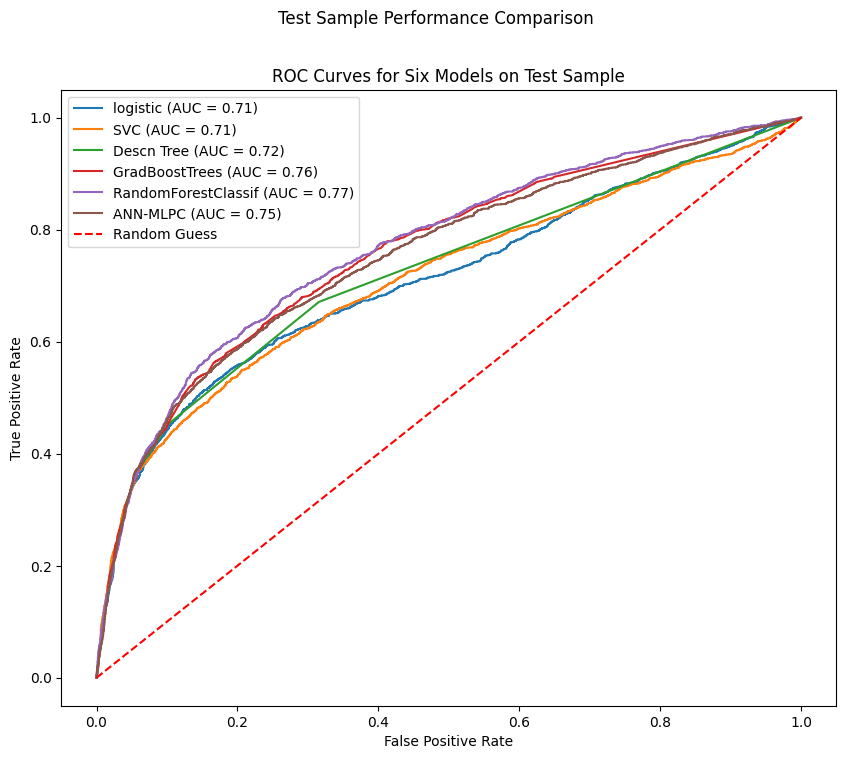

In [55]:
plt.figure(figsize=(10, 8))

for model in ['logistic', 'SVC', 'Descn Tree','GradBoostTrees','RandomForestClassif','ANN-MLPC']:
    fpr, tpr, _ = metrics.roc_curve(Y_test_['Y'], Y_test_[model])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('Test Sample Performance Comparison')
plt.title('ROC Curves for Six Models on Test Sample')
plt.legend()
plt.show()

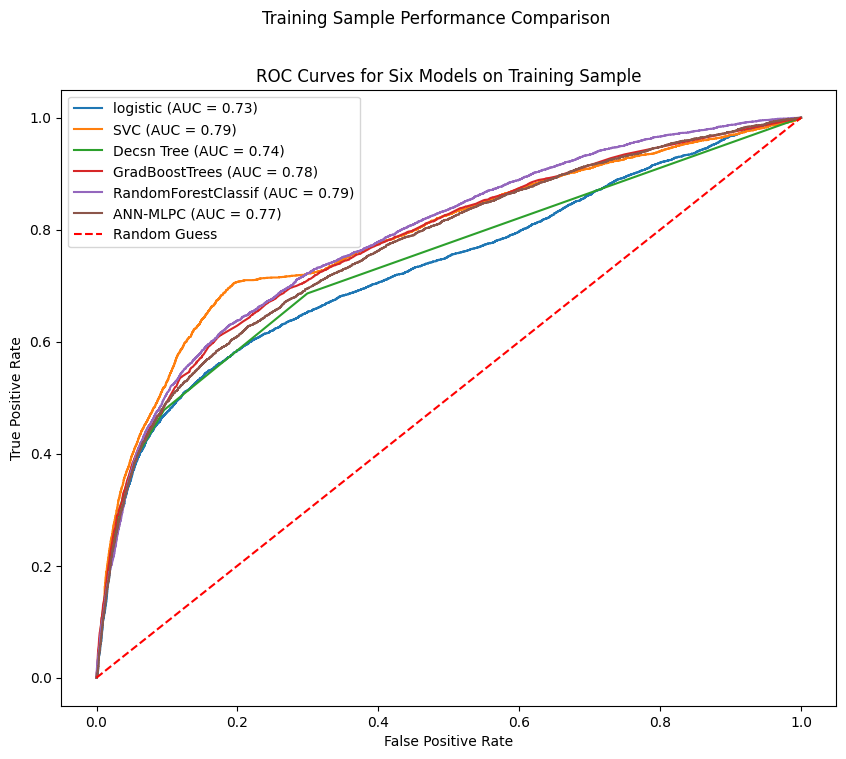

In [56]:
plt.figure(figsize=(10, 8))

for model in ['logistic', 'SVC', 'Decsn Tree','GradBoostTrees','RandomForestClassif','ANN-MLPC']:
    fpr, tpr, _ = metrics.roc_curve(Y_train_['Y'], Y_train_[model])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('Training Sample Performance Comparison')
plt.title('ROC Curves for Six Models on Training Sample')
plt.legend()
plt.show()